# Fire scar mapping

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from osgeo import ogr
#from descartes.patch import PolygonPatch
#from matplotlib.collections import PatchCollection
prop_value = '010     03754'
gpd.__version__ # clip function in 7.0 or above.

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

'0.6.1'

https://towardsdatascience.com/what-is-new-in-geopandas-0-70-dda0ddc90978

In [2]:
cadastre = gpd.read_file(r"U:\LIB_Common\Cadastre\Datasets\Av_data\Cadastre.shp")
fire_2020 = gpd.read_file(r"U:\Working\Rangelands\Spatial Data\NAFI Firescars\2020 firescars\fs2020shp.shp")
fire_2019 = gpd.read_file(r"U:\Working\Rangelands\Spatial Data\NAFI Firescars\2019 firescars\fs2019shp.shp")
fire_2018 = gpd.read_file(r"U:\Working\Rangelands\Spatial Data\NAFI Firescars\2018 firescars\fs2018Revised.shp")



In [9]:
gpd.read_file(r"C:\Users\rmcgr\Desktop\firemaps\single_site_GCS_1994.shp")

,OBJECTID,PROP_NAME,SITE_NAME,uid,Shape_Leng,Shape_Area,geometry
0,1,Shenandoah,SDH06,1,0.003669,8.410915e-07,"POLYGON ((133.59162 -16.66542, 133.59160 -16.6..."


In [3]:
propName = 'NT Portion'
propNum = str(4867)

In [10]:
prop =cadastre[(cadastre["LOC_NAME"]== propName) & (cadastre["PARCEL"] == propNum)]
print("Prop crs: ", prop.crs)

Prop crs:  {'init': 'epsg:4283'}


fire_2020 crs:  {'proj': 'longlat', 'ellps': 'GRS80', 'no_defs': True}


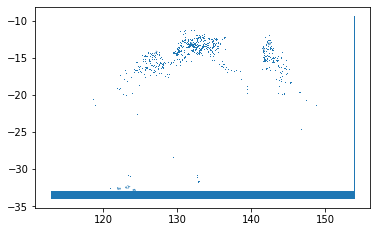

In [13]:
fire_2020.plot()
print('fire_2020 crs: ', fire_2020.crs)

In [23]:
fire_2020.crs={'init': 'epsg:4283'}
fire_2019.crs={'init': 'epsg:4283'}
fire_2018.crs={'init': 'epsg:4283'}

<AxesSubplot:>

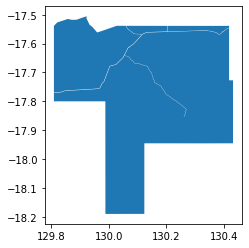

In [8]:
prop.plot()

In [41]:
prop_fire = gpd.sjoin(prop, fire_2019, how="right", op='intersects')
#prop_fire
new = prop_fire[["Id", "gridcode", "month", "geometry"]]
new

,Id,gridcode,month,geometry
index_right,,,,
57318,81347,190,10,"POLYGON ((129.80750 -17.52250, 129.80250 -17.5..."
0,1,180,10,"POLYGON ((142.27250 -10.59500, 142.26500 -10.5..."
1,4,193,10,"POLYGON ((142.25000 -10.60000, 142.24750 -10.6..."
2,6,193,10,"POLYGON ((142.31000 -10.61000, 142.30500 -10.6..."
3,9,180,10,"POLYGON ((142.20000 -10.64000, 142.19250 -10.6..."
...,...,...,...,...
71757,101672,75,6,"POLYGON ((119.65250 -33.91000, 119.65000 -33.9..."
71758,101673,75,6,"POLYGON ((119.61750 -33.94750, 119.61750 -33.9..."
71759,101674,75,6,"POLYGON ((119.61750 -33.94750, 119.61750 -33.9..."


In [3]:
import geopandas
from shapely.geometry import Polygon

In [4]:
capitals = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Create a subset of the world data that is just the South American continent
south_america = world[world["continent"] == "South America"]

# Create a custom polygon
polygon = Polygon([(0, 0), (0, 90), (180, 90), (180, 0), (0, 0)])
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=world.crs)

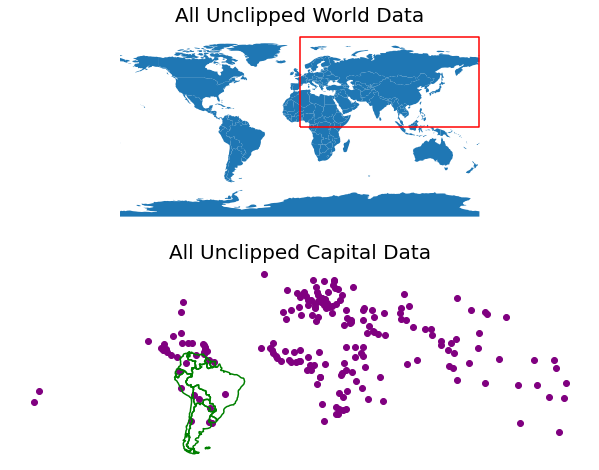

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax=ax1, color="red")
south_america.boundary.plot(ax=ax2, color="green")
capitals.plot(ax=ax2, color="purple")
ax1.set_title("All Unclipped World Data", fontsize=20)
ax2.set_title("All Unclipped Capital Data", fontsize=20)
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

In [6]:
world_clipped = geopandas.clip(world, polygon)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the world
# sphinx_gallery_thumbnail_number = 2
fig, ax = plt.subplots(figsize=(12, 8))
world_clipped.plot(ax=ax, color="purple")
world.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("World Clipped", fontsize=20)
ax.set_axis_off()
plt.show()

AttributeError: module 'geopandas' has no attribute 'clip'